# Basic Data Visualization for wav files

Import necessary libraries for data visualization

In [32]:
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np
import math

## Load a wav file

In [28]:
cantina, _ = librosa.load('slices/cantina.wav')

[Text(0.5, 1.0, 'Wave form of Cantina')]

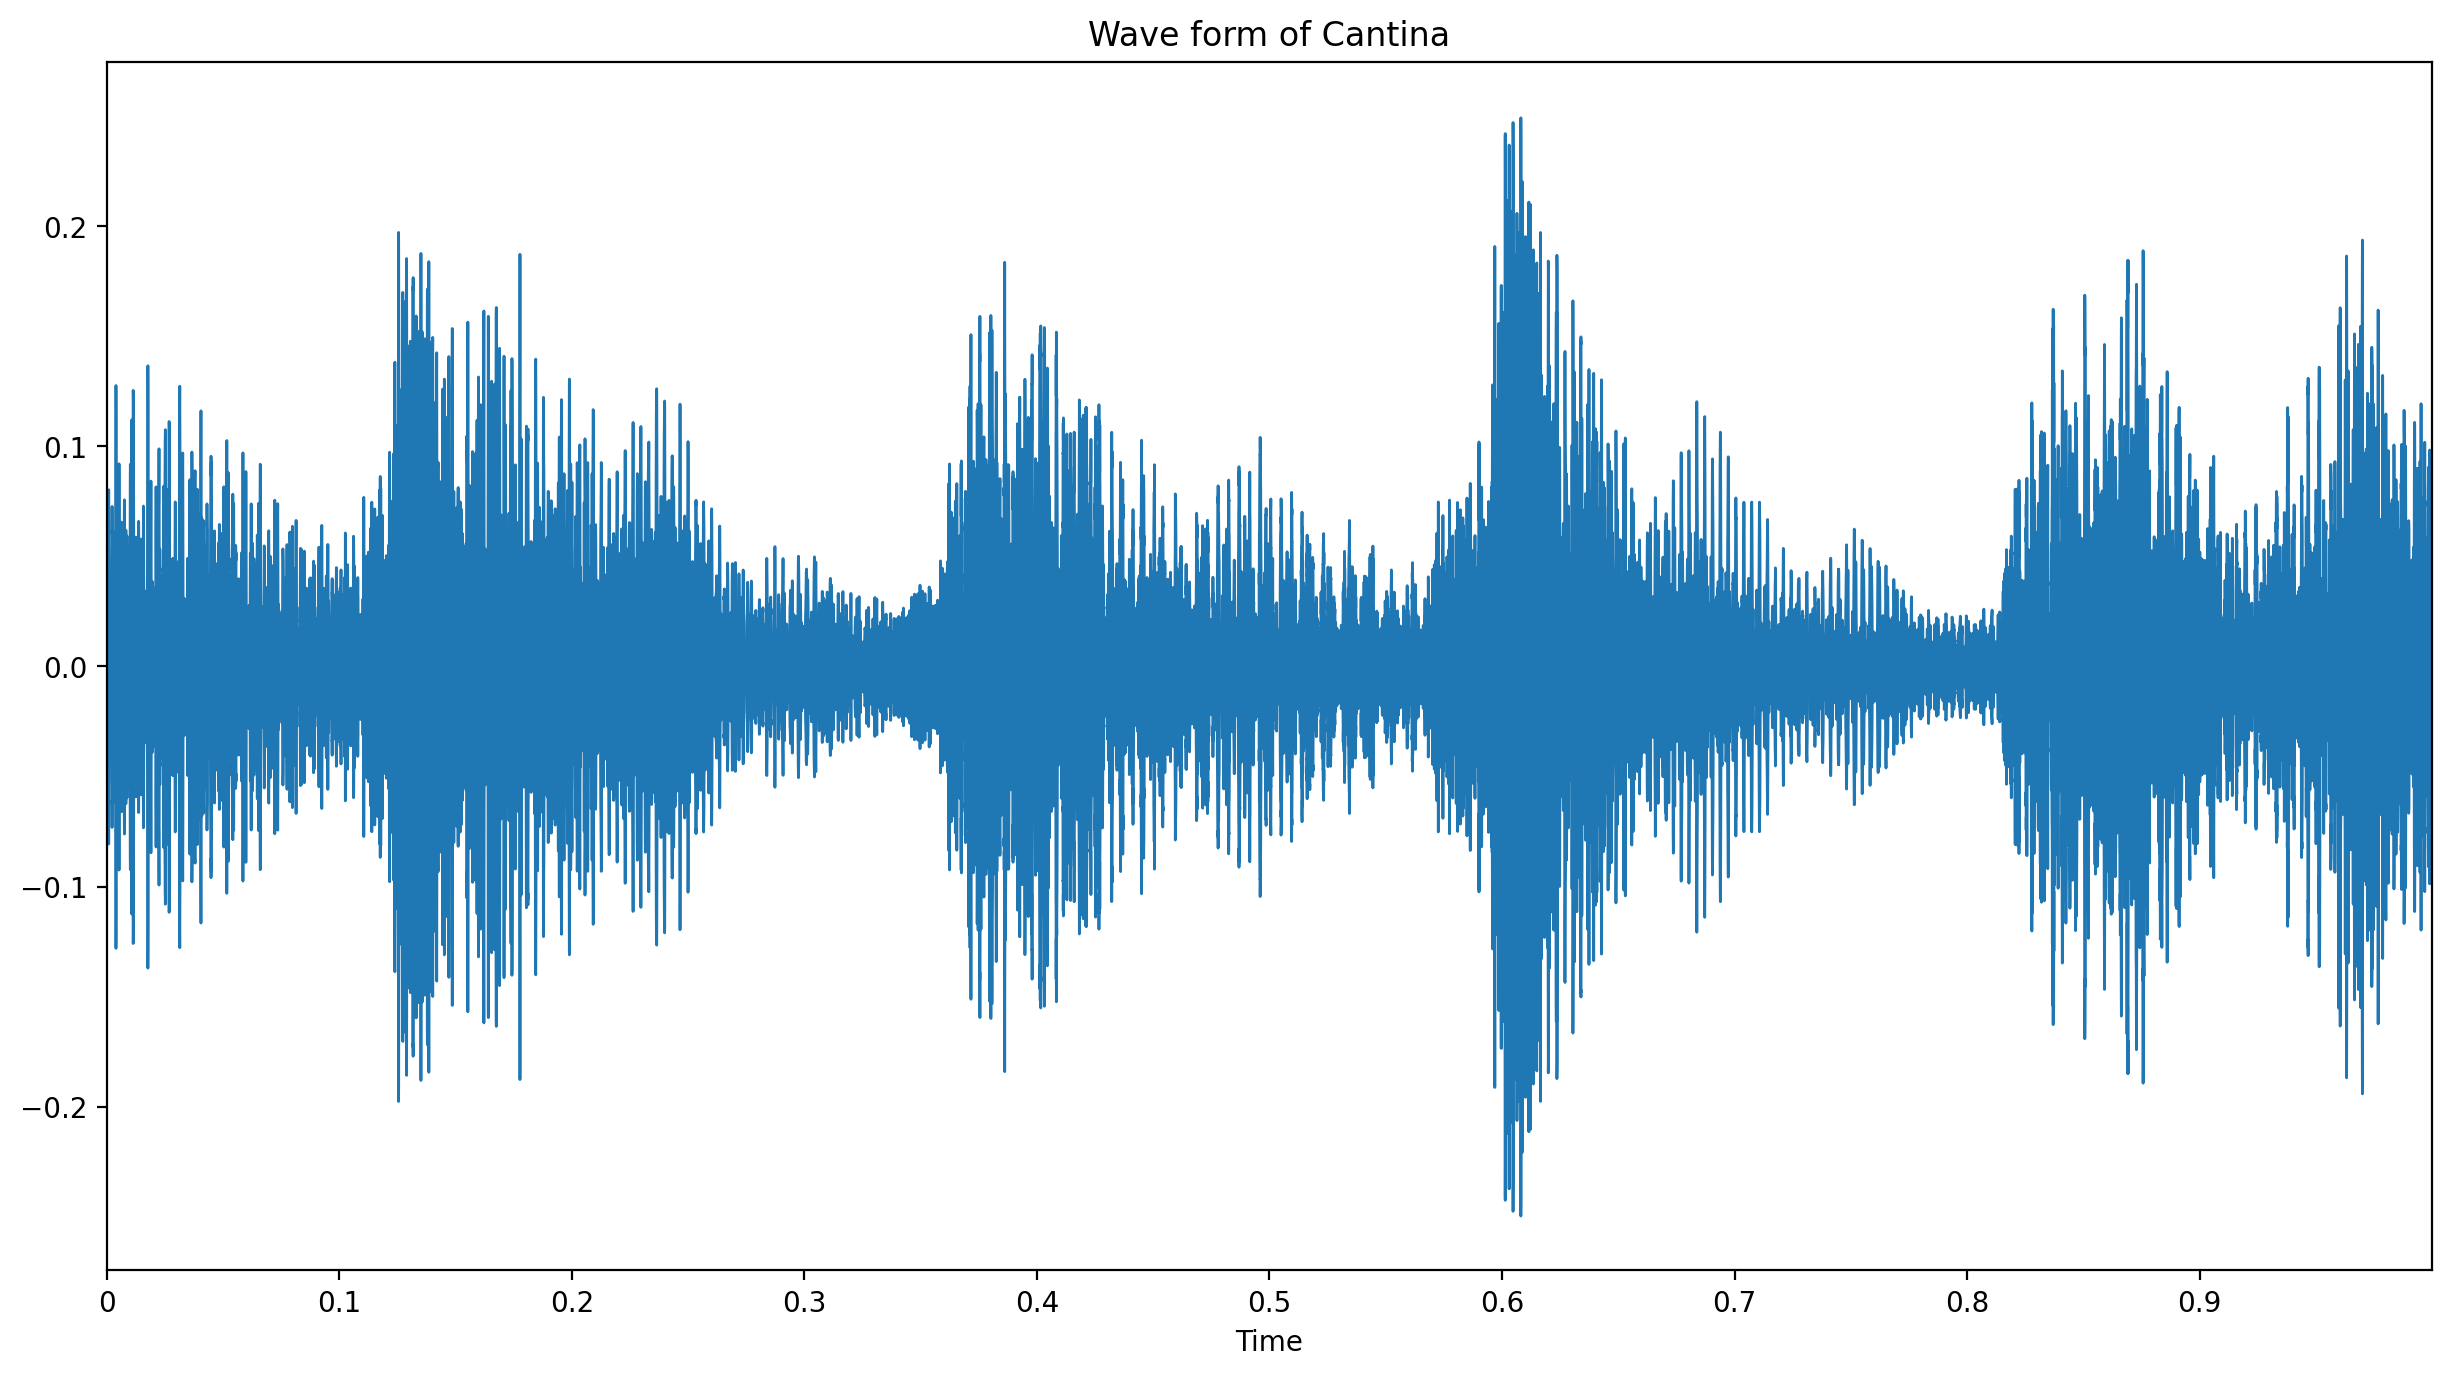

In [47]:
fig, ax = plt.subplots(1, figsize=(15,8), dpi=200)
ld.waveplot(cantina, sr=22050)
ax.set(title="Wave form of Cantina")

## Feature visualization
Visualization of three different features including the Amplitude Envelope, Root-Mean-Square Energy, and Zero-Crossing Rate

Definition of a function to determine the Amplitude Envelope of the signal. Displays the largest aplitude within subsections of the signal called frames.

In [40]:
def AmpEnv(sig, frame_length):
    envelope = []
    num_frames = math.floor(sig.shape[0]/frame_length)
    for i in range(num_frames):
        start = i*frame_length
        end = (i+1)*(frame_length-1)
        envelope.append(np.max(sig[start:end]))
    return np.array(envelope)
        

Plotting the Amplitude Envelope of Cantina against the Wave form

[Text(0.5, 1.0, 'Amplitude Envelope of Cantina')]

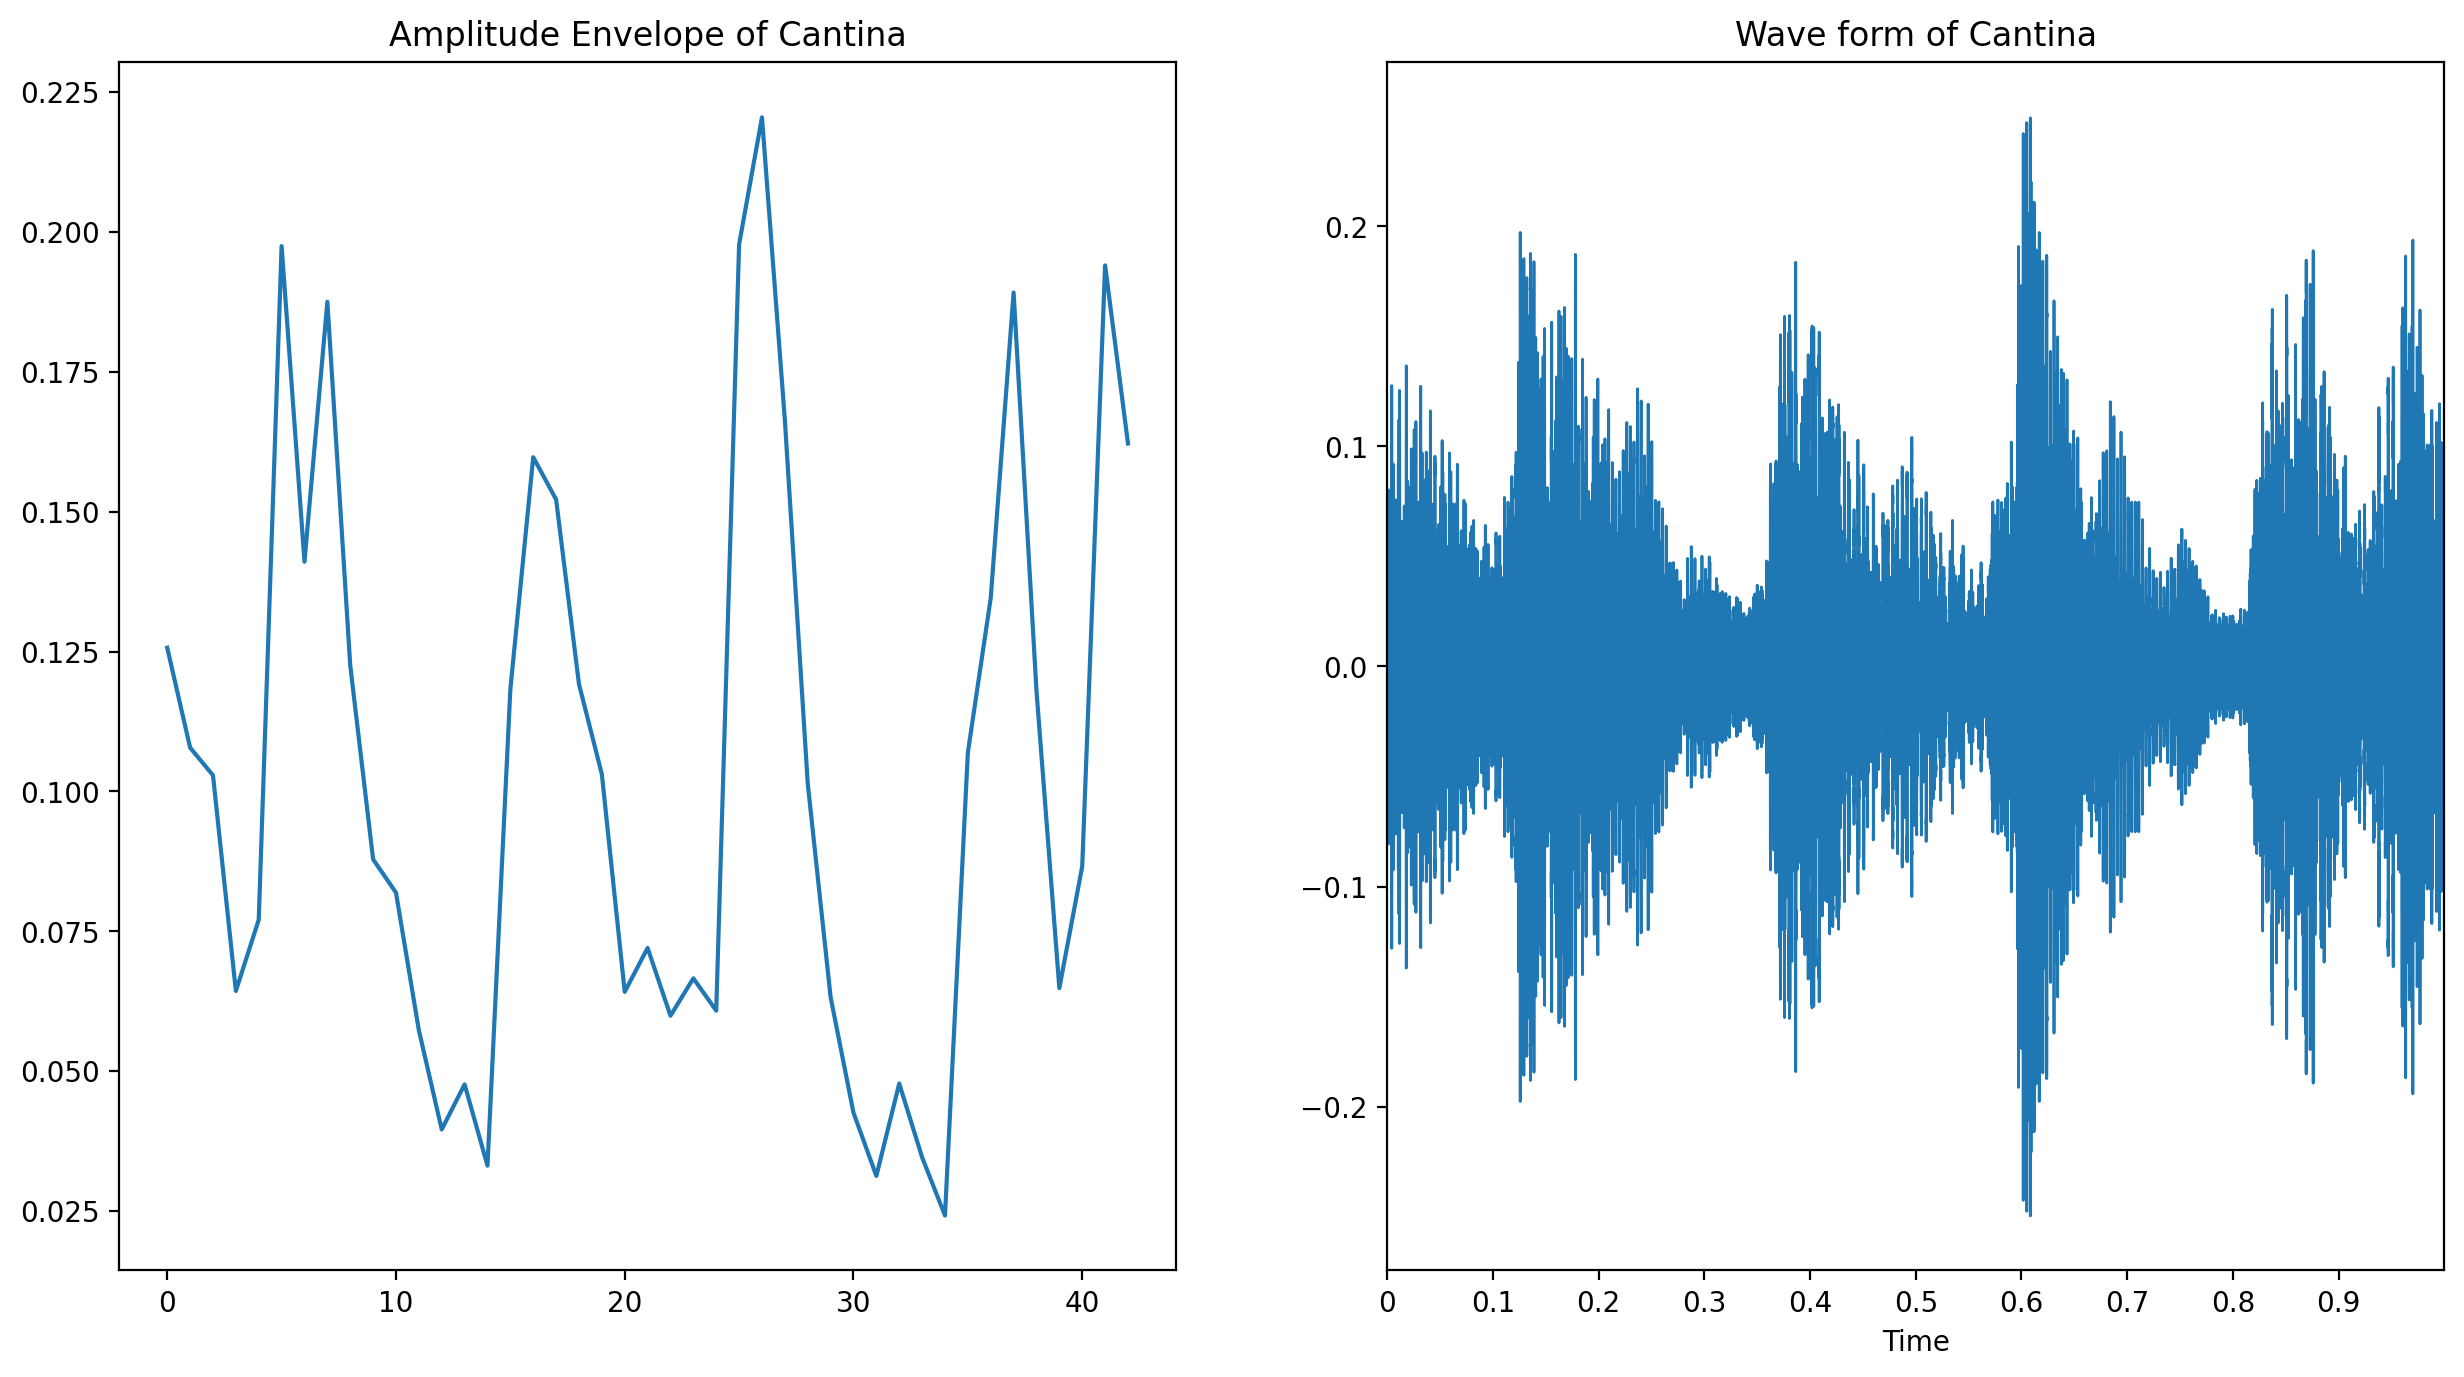

In [50]:
fig, ax = plt.subplots(1,2, figsize=(15,8), dpi=200)
ld.waveplot(cantina, sr=22050)
ax[1].set(title="Wave form of Cantina")
ax[0].plot(AmpEnv(cantina, 512))
ax[0].set(title="Amplitude Envelope of Cantina")


Root-Mean-Squared Energy is similar to the Amplitude Envelope but is better at dealing with outliers. Also allows for the viewer to understand the loudness of the sounds vs pure aplitude.

In [51]:
cantinaRMS = librosa.feature.rms(y = cantina, frame_length=512, hop_length=512)

[Text(0.5, 1.0, 'Root-Mean-Squared Energy')]

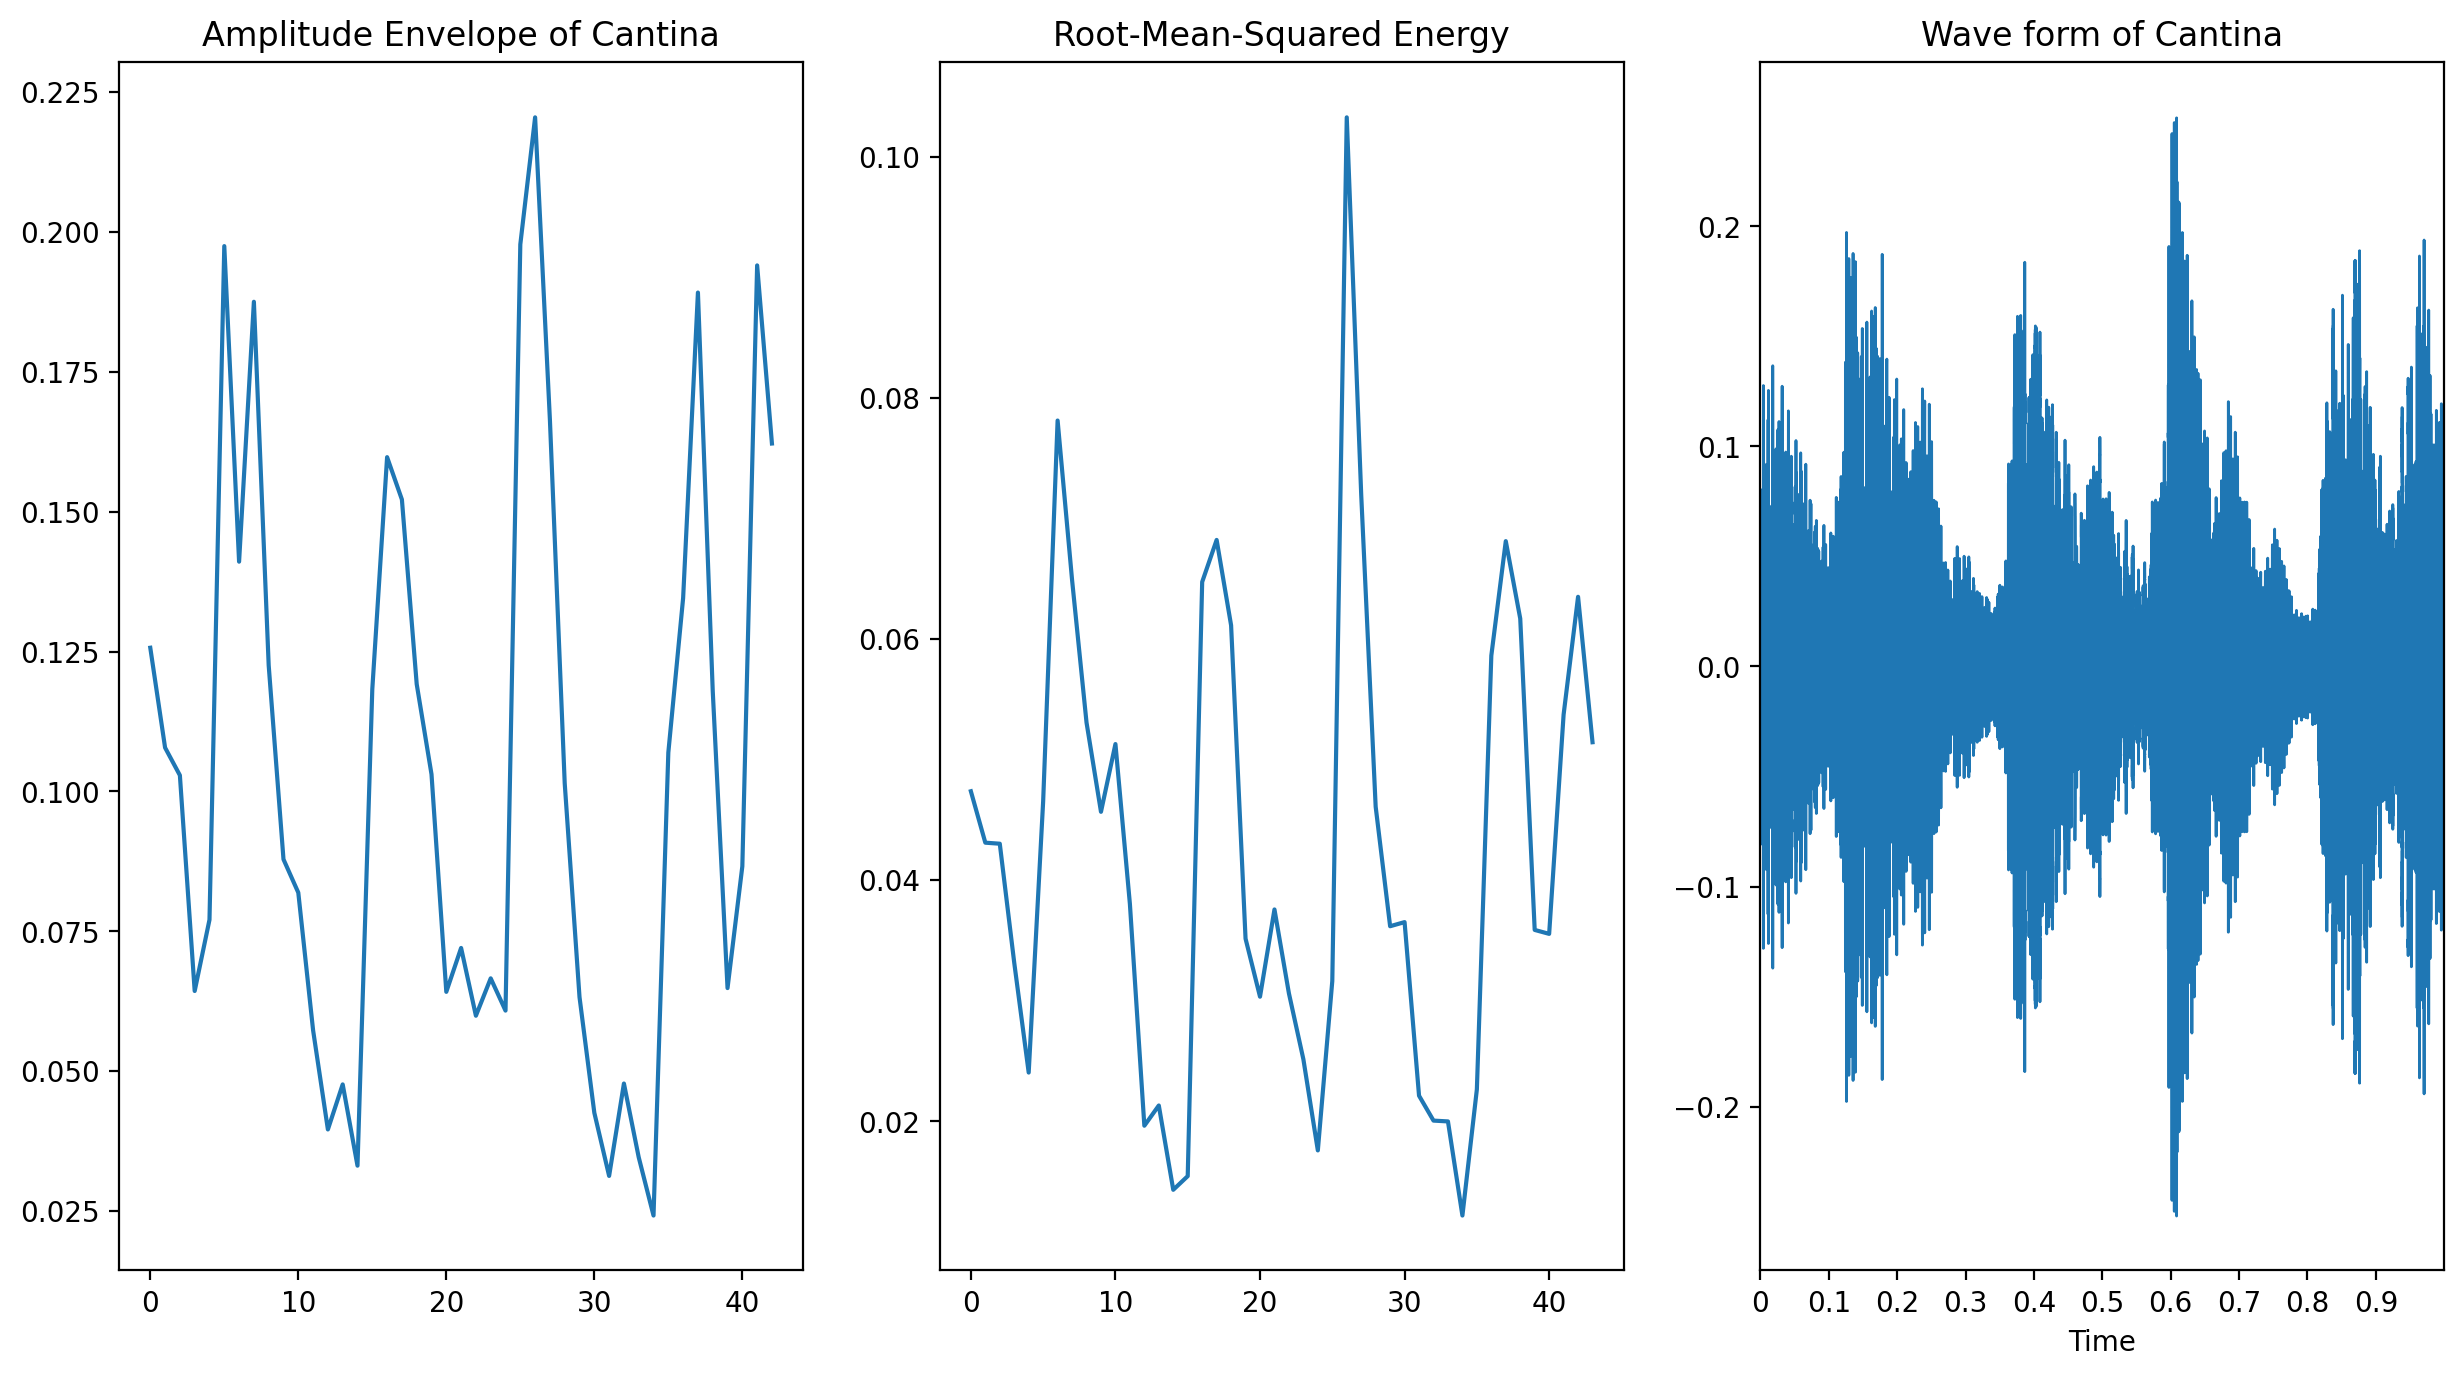

In [52]:
fig, ax = plt.subplots(1,3, figsize=(15,8), dpi=200)
ld.waveplot(cantina, sr=22050)
ax[2].set(title="Wave form of Cantina")
ax[0].plot(AmpEnv(cantina, 512))
ax[0].set(title="Amplitude Envelope of Cantina")
ax[1].plot(cantinaRMS.T)
ax[1].set(title="Root-Mean-Squared Energy")

Zero-Crossing Rate is the rate at which the amplitude changes within a frame. 

In [54]:
cantinaZCR = librosa.feature.zero_crossing_rate(y = cantina, frame_length=512, hop_length=512)

[Text(0.5, 1.0, 'Zero-Crossing Rate')]

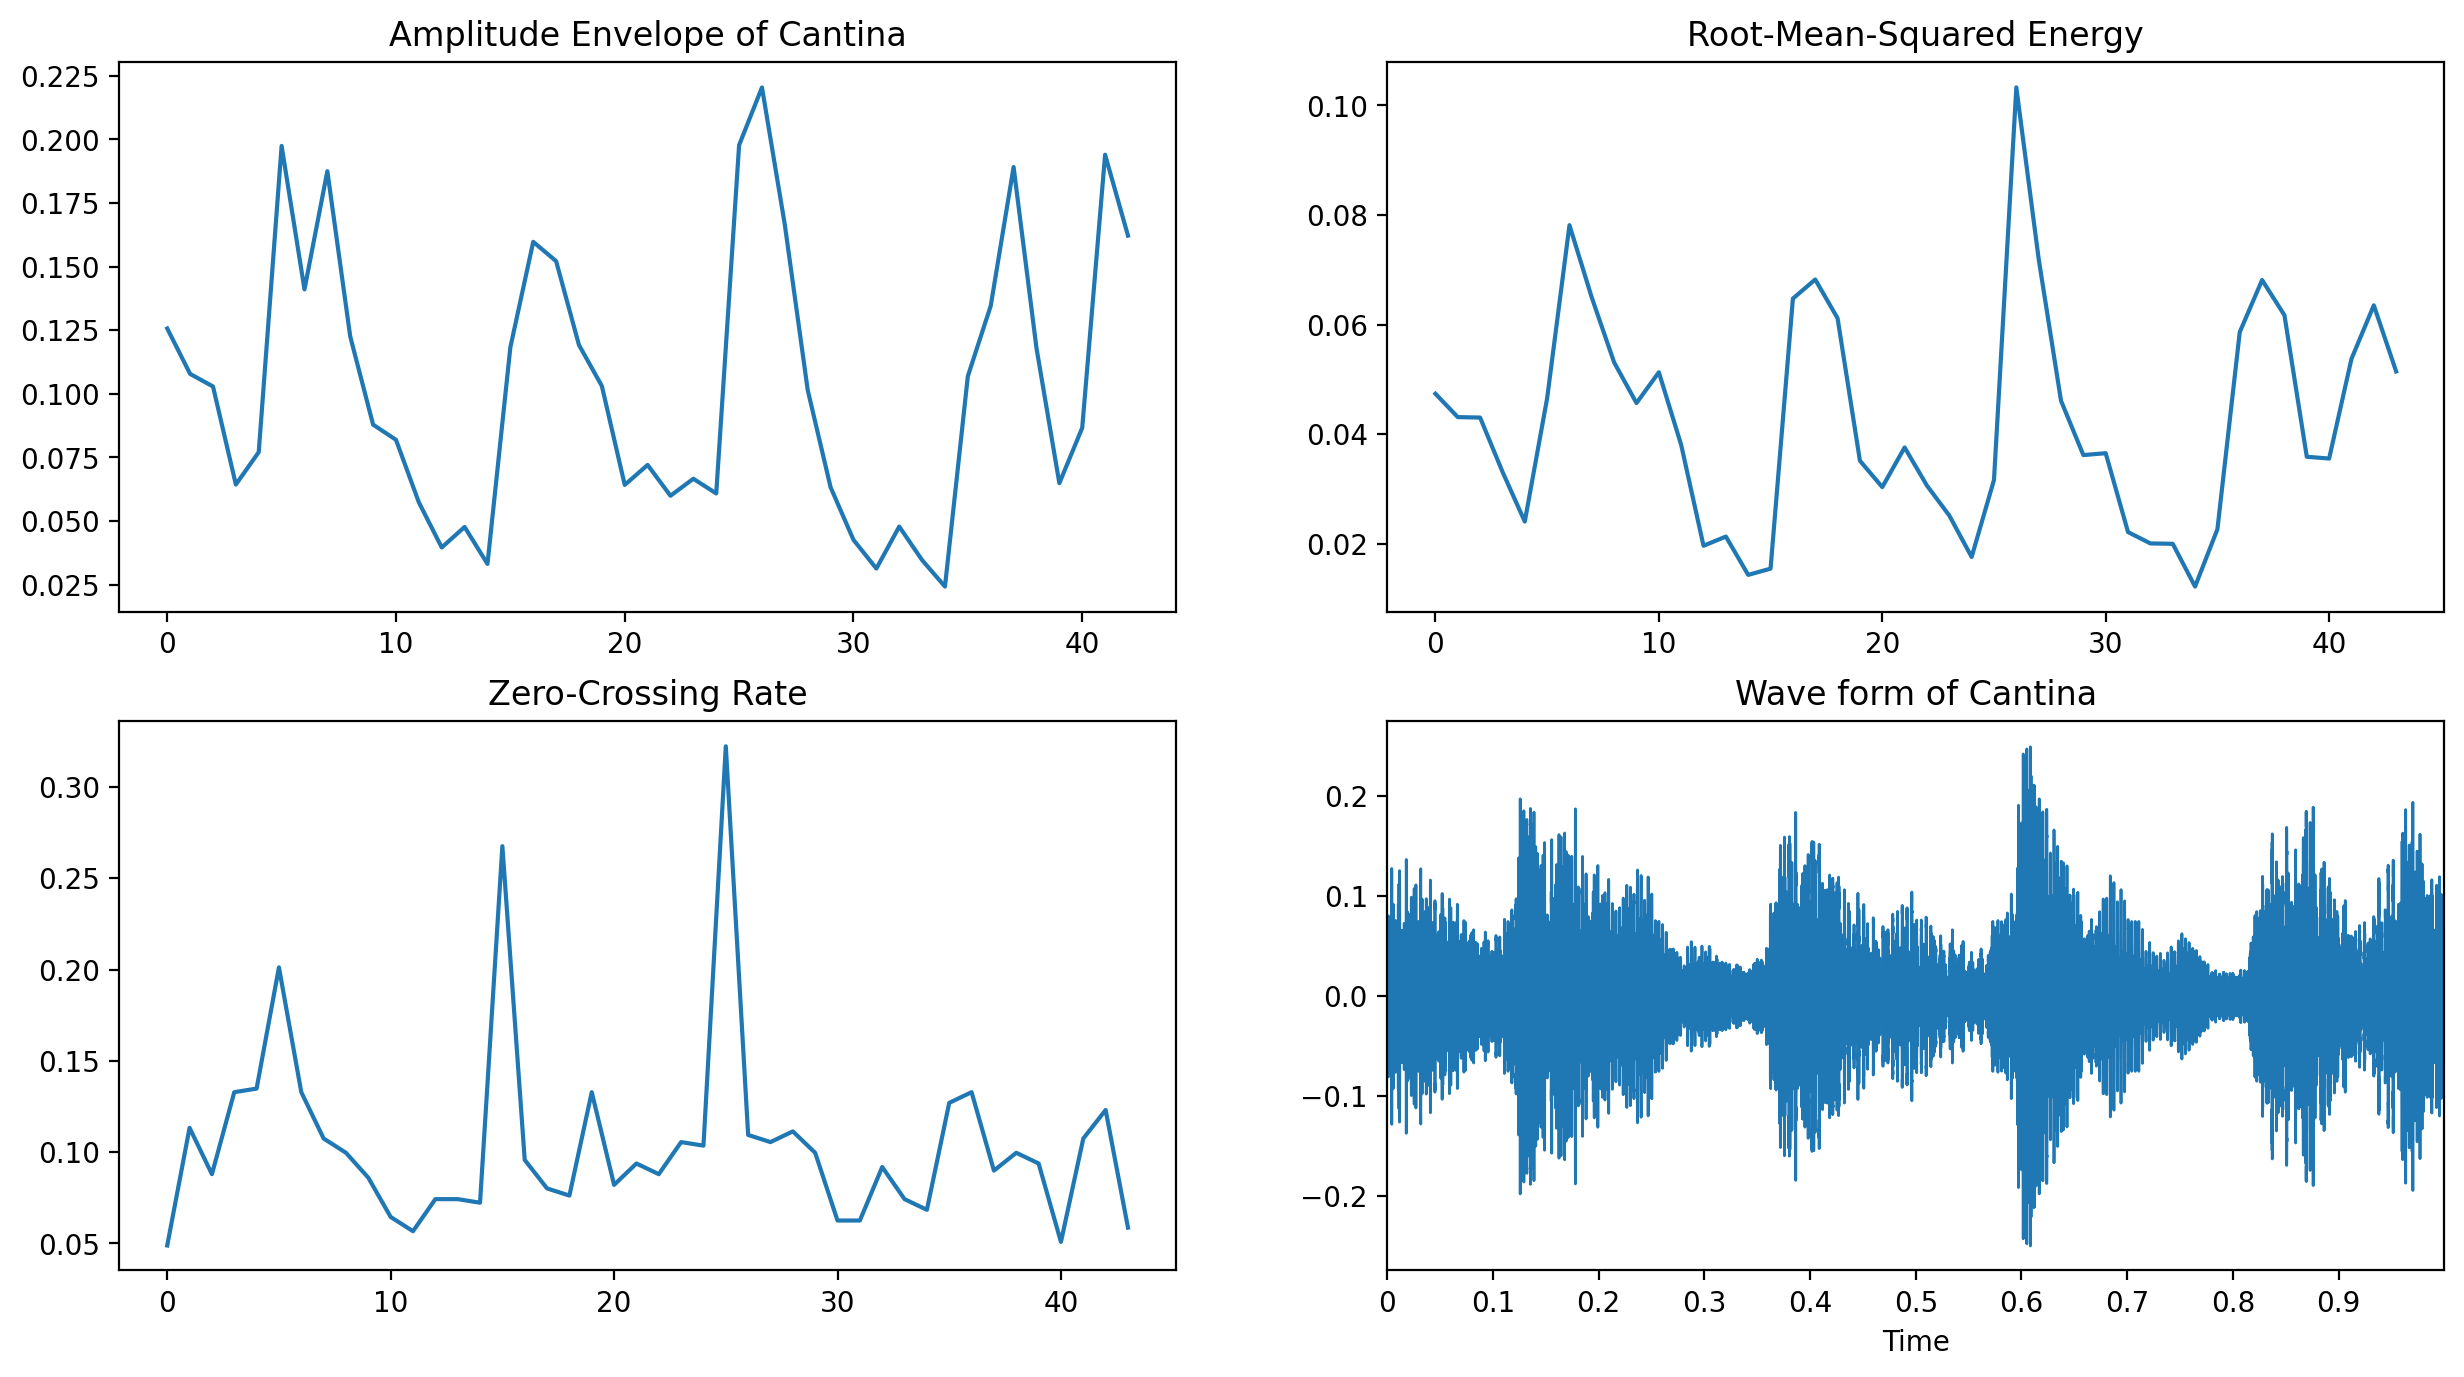

In [55]:
fig, ax = plt.subplots(2,2, figsize=(15,8), dpi=200)
ld.waveplot(cantina, sr=22050)
ax[1,1].set(title="Wave form of Cantina")
ax[0,0].plot(AmpEnv(cantina, 512))
ax[0,0].set(title="Amplitude Envelope of Cantina")
ax[0,1].plot(cantinaRMS.T)
ax[0,1].set(title="Root-Mean-Squared Energy")
ax[1,0].plot(cantinaZCR.T)
ax[1,0].set(title="Zero-Crossing Rate")